<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project4 - Clustering</h3>
</div>

<img src = "https://miro.medium.com/max/5760/1*_SRbz8535-CxPzo6IL9pBA.png" width=80%>

## Importing the libraries

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

## Load and Prepare Data

In [2]:
file_path = '/content/Mall_Customers.csv'
mall_customers_df = pd.read_csv(file_path)

In [4]:
mall_customers_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [13]:
mall_customers_df.info()
mall_customers_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
mall_customers_df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
X = mall_customers_df.iloc[:, :-1].values
y = mall_customers_df.iloc[:, -1].values

In [10]:
print(X)

[[1 'Male' 19 15]
 [2 'Male' 21 15]
 [3 'Female' 20 16]
 [4 'Female' 23 16]
 [5 'Female' 31 17]
 [6 'Female' 22 17]
 [7 'Female' 35 18]
 [8 'Female' 23 18]
 [9 'Male' 64 19]
 [10 'Female' 30 19]
 [11 'Male' 67 19]
 [12 'Female' 35 19]
 [13 'Female' 58 20]
 [14 'Female' 24 20]
 [15 'Male' 37 20]
 [16 'Male' 22 20]
 [17 'Female' 35 21]
 [18 'Male' 20 21]
 [19 'Male' 52 23]
 [20 'Female' 35 23]
 [21 'Male' 35 24]
 [22 'Male' 25 24]
 [23 'Female' 46 25]
 [24 'Male' 31 25]
 [25 'Female' 54 28]
 [26 'Male' 29 28]
 [27 'Female' 45 28]
 [28 'Male' 35 28]
 [29 'Female' 40 29]
 [30 'Female' 23 29]
 [31 'Male' 60 30]
 [32 'Female' 21 30]
 [33 'Male' 53 33]
 [34 'Male' 18 33]
 [35 'Female' 49 33]
 [36 'Female' 21 33]
 [37 'Female' 42 34]
 [38 'Female' 30 34]
 [39 'Female' 36 37]
 [40 'Female' 20 37]
 [41 'Female' 65 38]
 [42 'Male' 24 38]
 [43 'Male' 48 39]
 [44 'Female' 31 39]
 [45 'Female' 49 39]
 [46 'Female' 24 39]
 [47 'Female' 50 40]
 [48 'Female' 27 40]
 [49 'Female' 29 40]
 [50 'Female' 31

In [11]:
print(y)

[39 81  6 77 40 76  6 94  3 72 14 99 15 77 13 79 35 66 29 98 35 73  5 73
 14 82 32 61 31 87  4 73  4 92 14 81 17 73 26 75 35 92 36 61 28 65 55 47
 42 42 52 60 54 60 45 41 50 46 51 46 56 55 52 59 51 59 50 48 59 47 55 42
 49 56 47 54 53 48 52 42 51 55 41 44 57 46 58 55 60 46 55 41 49 40 42 52
 47 50 42 49 41 48 59 55 56 42 50 46 43 48 52 54 42 46 48 50 43 59 43 57
 56 40 58 91 29 77 35 95 11 75  9 75 34 71  5 88  7 73 10 72  5 93 40 87
 12 97 36 74 22 90 17 88 20 76 16 89  1 78  1 73 35 83  5 93 26 75 20 95
 27 63 13 75 10 92 13 86 15 69 14 90 32 86 15 88 39 97 24 68 17 85 23 69
  8 91 16 79 28 74 18 83]


## EDA

In [17]:
# Let's check for missing values in the dataset
missing_values = mall_customers_df.isnull().sum()

# Display the count of missing values for each column
missing_values


,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [19]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to the 'Gender' column
mall_customers_df['Gender'] = label_encoder.fit_transform(mall_customers_df['Gender'])

# Check the encoded values
mall_customers_df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


## Data Preprocessing

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [22]:
print(X_train)

[[109 'Male' 68 63]
 [108 'Male' 54 63]
 [190 'Female' 36 103]
 [15 'Male' 37 20]
 [57 'Female' 51 44]
 [20 'Female' 35 23]
 [115 'Female' 18 65]
 [40 'Female' 20 37]
 [186 'Male' 30 99]
 [125 'Female' 23 70]
 [99 'Male' 48 61]
 [124 'Male' 39 69]
 [120 'Female' 50 67]
 [54 'Male' 59 43]
 [34 'Male' 18 33]
 [180 'Male' 35 93]
 [182 'Female' 32 97]
 [107 'Female' 66 63]
 [200 'Male' 30 137]
 [139 'Male' 19 74]
 [117 'Female' 63 65]
 [68 'Female' 68 48]
 [79 'Female' 23 54]
 [43 'Male' 48 39]
 [18 'Male' 20 21]
 [6 'Female' 22 17]
 [128 'Male' 40 71]
 [106 'Female' 21 62]
 [49 'Female' 29 40]
 [67 'Female' 43 48]
 [55 'Female' 50 43]
 [85 'Female' 21 54]
 [184 'Female' 29 98]
 [159 'Male' 34 78]
 [167 'Male' 42 86]
 [114 'Male' 19 64]
 [13 'Female' 58 20]
 [118 'Female' 49 65]
 [94 'Female' 40 60]
 [121 'Male' 27 67]
 [155 'Female' 47 78]
 [91 'Female' 68 59]
 [82 'Male' 38 54]
 [123 'Female' 40 69]
 [192 'Female' 32 103]
 [14 'Female' 24 20]
 [83 'Male' 67 54]
 [133 'Female' 25 72]
 [18

In [23]:
X_train.shape

(160, 4)

In [24]:
print(X_test)

[[59 'Female' 27 46]
 [41 'Female' 65 38]
 [35 'Female' 49 33]
 [103 'Male' 67 62]
 [185 'Female' 41 99]
 [199 'Male' 32 137]
 [96 'Male' 24 60]
 [5 'Female' 31 17]
 [30 'Female' 23 29]
 [169 'Female' 36 87]
 [172 'Male' 28 87]
 [19 'Male' 52 23]
 [12 'Female' 35 19]
 [90 'Female' 50 58]
 [111 'Male' 65 63]
 [119 'Female' 51 67]
 [160 'Female' 30 78]
 [36 'Female' 21 33]
 [137 'Female' 44 73]
 [60 'Male' 53 46]
 [52 'Male' 33 42]
 [17 'Female' 35 21]
 [45 'Female' 49 39]
 [95 'Female' 32 60]
 [32 'Female' 21 30]
 [163 'Male' 19 81]
 [39 'Female' 36 37]
 [29 'Female' 40 29]
 [194 'Female' 38 113]
 [28 'Male' 35 28]
 [48 'Female' 27 40]
 [166 'Female' 36 85]
 [195 'Female' 47 120]
 [178 'Male' 27 88]
 [177 'Male' 58 88]
 [98 'Female' 27 60]
 [175 'Female' 52 88]
 [74 'Female' 60 50]
 [70 'Female' 32 48]
 [173 'Male' 36 87]]


In [25]:
print(y_train)

[43 46 85 13 50 98 48 75 97 29 42 91 57 60 92 90 86 50 83 10 43 48 52 36
 66 76 95 42 42 50 45 57 88  1 20 46 15 59 40 56 16 55 55 58 69 77 41 34
 68 65 49 17 83 24 76 55 79 74 22 92 54 73 41 20  6 55 46 17  6 42 39 89
 48 59 41 95 60  9 55 52 47 49 74 35 87 55 32 97 26 14  4 44 15 41 77 73
 35 72 13 56 88 88 54 17 51 79 92 93 48 51 54 32 53 61 14 77 63 42 90 75
 23  4 40 50 86  3 56 11 81 46  5 55 59 94 28 93 58 47 59 52 40 78  1 72
 36 48 35 14 82  5 42 75 12  8 42 71 73 49  5 73]


In [26]:
print(y_test)

[51 35 14 59 39 18 52 40 87 27 75 29 99 46 52 43 73 81  7 46 60 35 28 42
 73  5 26 31 91 61 47 75 16 69 15 50 13 56 47 10]


In [28]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)'
scaled_features = scaler.fit_transform(mall_customers_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Convert the scaled features back to a dataframe and keep original CustomerID and Gender
scaled_df = pd.DataFrame(scaled_features, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
scaled_df['CustomerID'] = mall_customers_df['CustomerID']
scaled_df['Gender'] = mall_customers_df['Gender']

# Display the first few rows of the scaled dataframe
scaled_df.head()


,Age,Annual Income (k$),Spending Score (1-100),CustomerID,Gender
0,-1.424569,-1.738999,-0.434801,1,1
1,-1.281035,-1.738999,1.195704,2,1
2,-1.352802,-1.700830,-1.715913,3,0
3,-1.137502,-1.700830,1.040418,4,0
4,-0.563369,-1.662660,-0.395980,5,0


## Strorytelling - Visualization

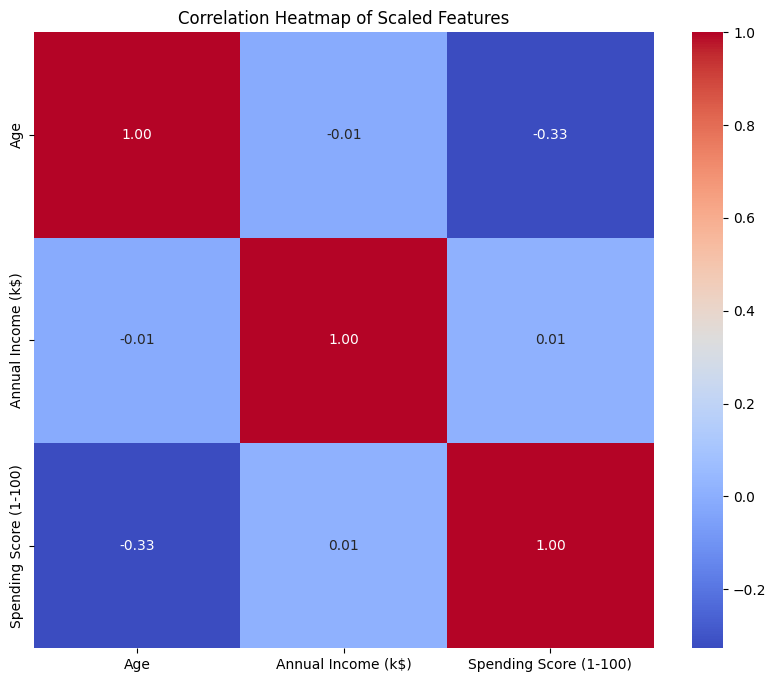

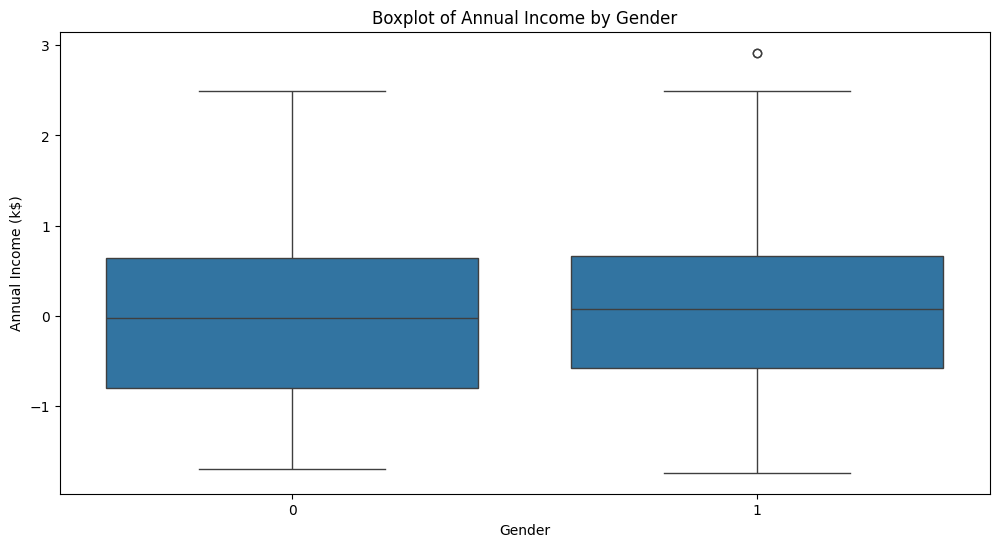

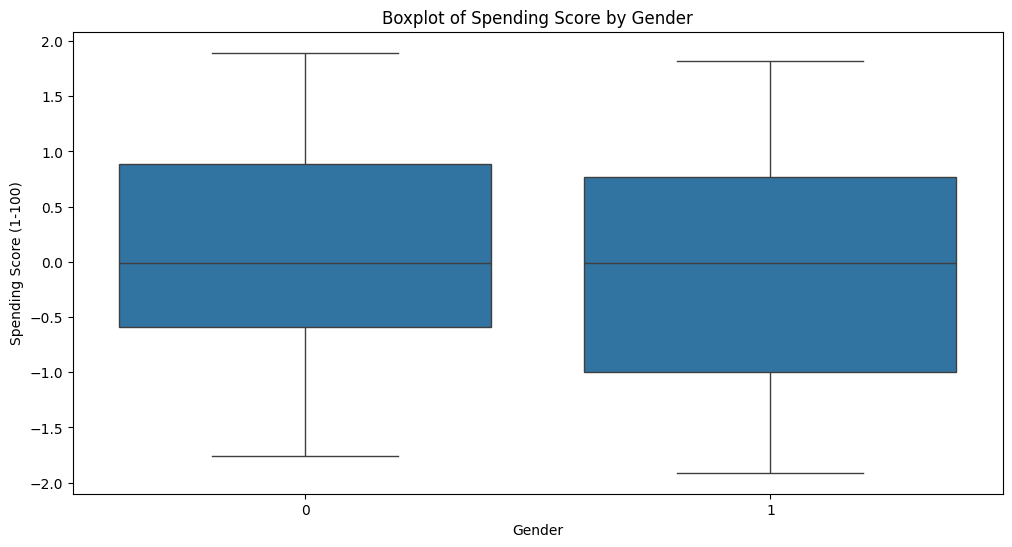

In [31]:
# Correlation heatmap of numeric features
plt.figure(figsize=(10, 8))
sns.heatmap(scaled_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap of Scaled Features')
plt.show()

# Boxplot for Annual Income by Gender
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='Annual Income (k$)', data=scaled_df)
plt.title('Boxplot of Annual Income by Gender')
plt.show()

# Boxplot for Spending Score by Gender
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=scaled_df)
plt.title('Boxplot of Spending Score by Gender')
plt.show()

## Trani the Model (Clustering)

In [34]:
# Preparing the data for KMeans clustering (using scaled numerical features)
X = scaled_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Initialize KMeans with a specified number of clusters (let's start with 5)
kmeans = KMeans(n_clusters=5, random_state=42)

# Train the model
kmeans.fit(X)

# Assigning the cluster labels to the original dataframe
scaled_df['Cluster'] = kmeans.labels_

# Display the first few rows of the dataframe with cluster labels
scaled_df.head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Age,Annual Income (k$),Spending Score (1-100),CustomerID,Gender,Cluster
0,-1.424569,-1.738999,-0.434801,1,1,1
1,-1.281035,-1.738999,1.195704,2,1,1
2,-1.352802,-1.700830,-1.715913,3,0,0
3,-1.137502,-1.700830,1.040418,4,0,1
4,-0.563369,-1.662660,-0.395980,5,0,1


In [36]:
# Initialize DBSCAN algorithm
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the model
dbscan.fit(X)

# Assigning the cluster labels to the dataframe
scaled_df['DBSCAN_Cluster'] = dbscan.labels_

# Display the first few rows of the dataframe with DBSCAN cluster labels
scaled_df.head()


,Age,Annual Income (k$),Spending Score (1-100),CustomerID,Gender,Cluster,DBSCAN_Cluster
0,-1.424569,-1.738999,-0.434801,1,1,1,-1
1,-1.281035,-1.738999,1.195704,2,1,1,0
2,-1.352802,-1.700830,-1.715913,3,0,0,-1
3,-1.137502,-1.700830,1.040418,4,0,1,0
4,-0.563369,-1.662660,-0.395980,5,0,1,-1


## Send us the Result (Maktabkhoone)